In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Data Exploration

In [2]:
df=pd.read_csv("E:/Datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#So first of all, the customer ID is a useless feature and we will remove it from our dataframe.
df.drop("customerID", axis="columns", inplace=True)

In [4]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df.TotalCharges.values
#So as you would see, the data type of TotalCharges is an object because its values have been stored as strings, that is, '29.85' 

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [6]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

pd.to_numeric(df.TotalCharges) <br>
If we run this code directly, we will get an error: <br>
Unable to parse string " " at position 488 <br>
This is because there are some values which have spaces and those spaces have been stored as empty strings. So, we have to solve this problem first.

In [7]:
#We will use coerce. Doing so would mean to ignore all the error values and python will consider those erroneous values as Null Values.
pd.to_numeric(df.TotalCharges, errors="coerce")

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [8]:
#Now lets see those null values (which were earlier the space values that we encountered)
pd.to_numeric(df.TotalCharges, errors="coerce").isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

Now, how to find the rows that have 'True' or basically that have null values? <br>
If I pass this into a Dataframe, my df will consider this as an index and then it will show only those rows that have 'True', that is, only the rows with null values.

In [9]:
df[pd.to_numeric(df.TotalCharges, errors="coerce").isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


As you would notice, the TotalCharges column is blank as these are all those rows which were skipped earlier when we passed coerce in the error parameter.

In [10]:
df.shape #Original Dataframe

(7043, 20)

In [11]:
df[pd.to_numeric(df.TotalCharges, errors="coerce").isnull()].shape #Df having only null values

(11, 20)

Since there are only 11 rows that have null values in a dataset of 7000 rows, we will drop these rows. 

In [12]:
df1= df[df.TotalCharges != " " ]
df1.shape #So now we have a new DataFrame with all the null values removed.

(7032, 20)

In [13]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [14]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)
df1.TotalCharges.dtypes

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


dtype('float64')

### Data Visualization

In [15]:
#Churn-Yes means that customers have stopped using the product or services
#Churn-No means that customers have not stopped using the product or services

Lets analyze the customers churn according to various parameters.

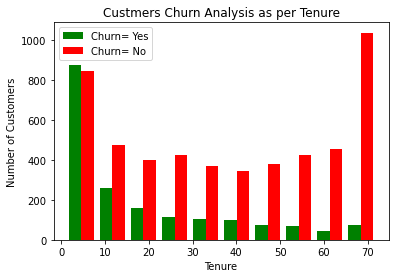

In [16]:
tenure_churn_yes= df1[df1.Churn=="Yes"].tenure
tenure_churn_no= df1[df1.Churn=="No"].tenure
plt.xlabel("Tenure")
plt.ylabel("Number of Customers")
plt.title("Custmers Churn Analysis as per Tenure")
plt.hist([tenure_churn_yes, tenure_churn_no], color=["green","red"], label=["Churn= Yes","Churn= No"])
plt.legend()

As we would notice, the customers who have a long tenure, that is, the ones who have been using service from a long time are pretty loyal. Whereas, there are a lot of new cutsomers leaving the service or the product. Lets analyze the Customer Churn according to some other parameters as well. 

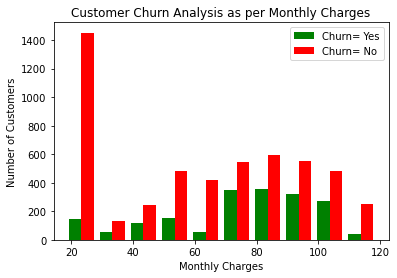

In [17]:
tenure_churn_yes= df1[df1.Churn=="Yes"].MonthlyCharges
tenure_churn_no= df1[df1.Churn=="No"].MonthlyCharges
plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Analysis as per Monthly Charges")
plt.hist([tenure_churn_yes, tenure_churn_no], color=["green","red"], label=["Churn= Yes","Churn= No"])
plt.legend()

In [18]:
#Lets print and see all the unique values in each column so as to get a better and comprehensive idea of the whole data.
for column in df1:
    print(f'{column}: {df1[column].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:

As we can see, there are a lot of columns having values in the form of Yes and No. Also, we can notice one more thing- in several columns, values like "No Internet Service" has the same meaning as the word "No". So we will clean the data by replacing those values with the right values.

In [19]:
#Lets print only the columns with the object data type values.
def print_unique_values(df):
    for column in df1:
        if df1[column].dtypes==object:
            print (f' {column}: {df[column].unique()}')

In [20]:
print_unique_values(df1)

 gender: ['Female' 'Male']
 Partner: ['Yes' 'No']
 Dependents: ['No' 'Yes']
 PhoneService: ['No' 'Yes']
 MultipleLines: ['No phone service' 'No' 'Yes']
 InternetService: ['DSL' 'Fiber optic' 'No']
 OnlineSecurity: ['No' 'Yes' 'No internet service']
 OnlineBackup: ['Yes' 'No' 'No internet service']
 DeviceProtection: ['No' 'Yes' 'No internet service']
 TechSupport: ['No' 'Yes' 'No internet service']
 StreamingTV: ['No' 'Yes' 'No internet service']
 StreamingMovies: ['No' 'Yes' 'No internet service']
 Contract: ['Month-to-month' 'One year' 'Two year']
 PaperlessBilling: ['Yes' 'No']
 PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
 Churn: ['No' 'Yes']


In [21]:
df1.replace('No internet service', 'No', inplace=True)
df1.replace('No phone service', 'No', inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [22]:
print_unique_values(df1)

 gender: ['Female' 'Male']
 Partner: ['Yes' 'No']
 Dependents: ['No' 'Yes']
 PhoneService: ['No' 'Yes']
 MultipleLines: ['No' 'Yes']
 InternetService: ['DSL' 'Fiber optic' 'No']
 OnlineSecurity: ['No' 'Yes']
 OnlineBackup: ['Yes' 'No']
 DeviceProtection: ['No' 'Yes']
 TechSupport: ['No' 'Yes']
 StreamingTV: ['No' 'Yes']
 StreamingMovies: ['No' 'Yes']
 Contract: ['Month-to-month' 'One year' 'Two year']
 PaperlessBilling: ['Yes' 'No']
 PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
 Churn: ['No' 'Yes']


### Encoding the Data

In [23]:
#Lets replace all the Yes and No values with 1 and 0 respectively.
column_names=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
              'DeviceProtection', 'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for column_names in df1:
    df1.replace("Yes", 1, inplace=True)
    df1.replace("No", 0, inplace=True)

In [24]:
print_unique_values(df1)

 gender: ['Female' 'Male']
 InternetService: ['DSL' 'Fiber optic' 0]
 Contract: ['Month-to-month' 'One year' 'Two year']
 PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [25]:
#Gender
df1["gender"].replace("Female", 1, inplace=True)
df1["gender"].replace("Male", 0, inplace=True)
df1["gender"].unique()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


array([1, 0], dtype=int64)

In [26]:
#InternetService has a value 0 which basically means No Internet Service. So lets resolve that as well.
df1["InternetService"].replace(0,'No Internet Service',inplace=True)
df1['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No Internet Service'], dtype=object)

Now, we still have columns like 'InternetService', 'Contract', 'PaymentMethod' with multiple string values. So, we will perform one hot encoding using the get_dummies method of pandas to resolve this conflict.

In [27]:
#One hot encoding for categorical columns
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No Internet Service', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [28]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No Internet Service,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [29]:
#So all the values are in numbers now. Lets check the data types.
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No Internet Ser

### Scaling the Data

Now, moving forward, lets look at our data. Do we need to scale it? <br>
Yes. <br>
Most of our columns contain values like 0 or 1. Those are okay. But if you look at columns like Tenure (values in 2 digits), Monthly Charges (in tens or hundreds), and Total Charges (in thousands), we need to scale these values so as to make them lie in a range of 0 to 1. We'll do this using MinMaxScaler().

In [30]:
scale_columns=['tenure', 'MonthlyCharges', 'TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df2[scale_columns]= scaler.fit_transform(df2[scale_columns])

In [31]:
for column in df2:
    print(f'{column}: {df2[column].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [32]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No Internet Service,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [33]:
df2["Churn"].sample(10)

5965    0
2915    0
4874    1
5146    0
1505    1
4294    0
3133    0
1661    0
1094    0
4011    0
Name: Churn, dtype: int64

### Train Test Split

In [34]:
x=df2.drop("Churn", axis='columns')
y=df2["Churn"]

In [35]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y= train_test_split(x,y,random_state=5, test_size=0.2)

In [36]:
train_x.shape

(5625, 26)

In [37]:
test_x.shape

(1407, 26)

In [38]:
train_y.shape

(5625,)

In [39]:
test_y.shape

(1407,)

In [40]:
len(train_x.columns)

26

In [41]:
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras

def ann(train_x,train_y,test_x,test_y,loss,weights):

    model= keras.Sequential([ 
                            keras.layers.Dense(20, input_shape=(26,), activation='relu'),
                            keras.layers.Dense(15, activation='relu'),
                            keras.layers.Dense(1, activation='sigmoid')
                            ])

    model.compile(optimizer='adam',
                  loss=loss,
                  metrics=['accuracy'])

    
    
    if weights==-1:
        model.fit(train_x,train_y,epochs=100)
    else:
        model.fit(train_x,train_y,epochs=100,class_weight=weights)
        
    print(model.evaluate(test_x,test_y))
    pred_y= model.predict(test_x)
    pred_y=np.round(pred_y)
    
    print("Classification Report is: \n ", classification_report(test_y,pred_y))
    return pred_y

In [42]:
ann(train_x,train_y,test_x,test_y, "binary_crossentropy",-1)

Epoch 1/100
176/176 [==============================] - 1s 598us/step - loss: 0.6353 - accuracy: 0.5898
Epoch 2/100
176/176 [==============================] - 0s 613us/step - loss: 0.4245 - accuracy: 0.8019
Epoch 3/100
176/176 [==============================] - 0s 619us/step - loss: 0.4275 - accuracy: 0.7969
Epoch 4/100
176/176 [==============================] - 0s 609us/step - loss: 0.4071 - accuracy: 0.8111
Epoch 5/100
176/176 [==============================] - 0s 611us/step - loss: 0.4073 - accuracy: 0.8098
Epoch 6/100
176/176 [==============================] - 0s 623us/step - loss: 0.4168 - accuracy: 0.8035
Epoch 7/100
176/176 [==============================] - 0s 628us/step - loss: 0.4056 - accuracy: 0.8063
Epoch 8/100
176/176 [==============================] - 0s 570us/step - loss: 0.4168 - accuracy: 0.8086
Epoch 9/100
176/176 [==============================] - 0s 634us/step - loss: 0.4114 - accuracy: 0.8142
Epoch 10/100
176/176 [==============================] - 0s 622us/step - l

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

## Balancing the Imbalanced Dataset 

### Method 1- Undersampling

In Undersampling, when you have two classes- one having large no. of samples and one having small no.of samples, lets say 9000 samples of class A and 1000 samples of class B. So you basically select any 1000 random samples out of those 9000 samples of class A and train them with the 1000 samples of class B. So you basically train a total of 2000 samples (with equal no. of samples frok both the classes) 

In [43]:
df2["Churn"].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

So we have to take 1869 samples of class 0. Lets proceed towards it.

In [44]:
#Class Count
class_0_size, class_1_size= df2["Churn"].value_counts()
print(class_0_size)
print(class_1_size)

5163
1869


In [45]:
#Dividing by Class
df2_class_0= df2[df2["Churn"] == 0]
df2_class_1= df2[df2["Churn"] == 1]

In [46]:
df2_class_0.shape, df2_class_1.shape

((5163, 27), (1869, 27))

In [47]:
df2_class_0_new= df2_class_0.sample(class_1_size)
df2_class_0_new.shape

(1869, 27)

In [48]:
df3= pd.concat([df2_class_0_new, df2_class_1], axis=0)
print("Random under-sampling: ")
print(df3.Churn.value_counts())
print("Shape of the df3: ",df3.shape)

Random under-sampling: 
1    1869
0    1869
Name: Churn, dtype: int64
Shape of the df3:  (3738, 27)


In [49]:
x_undersample=df3.drop('Churn', axis=1)
y_undersample= df3['Churn']
print(x_undersample.shape)
print(y_undersample.shape)

(3738, 26)
(3738,)


In [50]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y= train_test_split(x_undersample, y_undersample, random_state=15, test_size=0.2, stratify=y_undersample)

In [51]:
# Number of classes in training Data
train_y.value_counts()
#You can see that our training set has equal no. of classes of 0 and 1. This is because of the parameter 'stratify' that we passed earlier.

1    1495
0    1495
Name: Churn, dtype: int64

In [52]:
ann(train_x,train_y,test_x,test_y, "binary_crossentropy",-1)

Epoch 1/100
94/94 [==============================] - 0s 645us/step - loss: 0.7156 - accuracy: 0.4797
Epoch 2/100
94/94 [==============================] - 0s 635us/step - loss: 0.5562 - accuracy: 0.7167
Epoch 3/100
94/94 [==============================] - 0s 645us/step - loss: 0.5050 - accuracy: 0.7624
Epoch 4/100
94/94 [==============================] - 0s 656us/step - loss: 0.4991 - accuracy: 0.7570
Epoch 5/100
94/94 [==============================] - 0s 645us/step - loss: 0.4870 - accuracy: 0.7777
Epoch 6/100
94/94 [==============================] - 0s 613us/step - loss: 0.4938 - accuracy: 0.7620
Epoch 7/100
94/94 [==============================] - 0s 651us/step - loss: 0.5035 - accuracy: 0.7632
Epoch 8/100
94/94 [==============================] - 0s 638us/step - loss: 0.4912 - accuracy: 0.7685
Epoch 9/100
94/94 [==============================] - 0s 473us/step - loss: 0.5033 - accuracy: 0.7549
Epoch 10/100
94/94 [==============================] - 0s 618us/step - loss: 0.4961 - accura

array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],

### Method 2- Oversampling

class A= 1000 Samples <br>
class B= 500 Samples <br>
In such a case, if we intend to perform oversampling, we'll basically the duplicate the samples of class B, so as to make them 1000 in number. Then, we'll train a total of 2000 samples, which would include 1000 samples from each class.

In [53]:
#Class Count
print(class_0_size)
print(class_1_size)

5163
1869


So now, we'll duplicate the samples of class 1 since they are less in number.

In [54]:
df2_class_0.shape, df2_class_1.shape

((5163, 27), (1869, 27))

If I write a code like this: <br>
df_class_1_oversample= df2[df2["Churn"]==1].sample(2000, replace=True) <br>
This would mean to make a new dataframe with 2000 samples of class 1. Now originally there were like 1869 samples. So what happened? Some 31 samples out of those 1869 samples were chosen randomly and they were duplicated in order to make the total no. of samples in class 1 to be equal to 2000.

In [55]:
df_class_1_oversample= df2[df2["Churn"]==1].sample(class_0_size, replace=True) 
df_class_1_oversample.shape
df3_oversample= pd.concat([df2_class_0, df_class_1_oversample]) 

In [56]:
df3_oversample.shape #We have 5163 samples of each class now, making it a total of 10,326 samples

(10326, 27)

In [57]:
print("Random under-sampling: ")
print(df3_oversample.Churn.value_counts())

Random under-sampling: 
1    5163
0    5163
Name: Churn, dtype: int64


In [58]:
x_oversample=df3_oversample.drop('Churn', axis=1)
y_oversample= df3_oversample['Churn']
print(x_oversample.shape)
print(y_oversample.shape)

(10326, 26)
(10326,)


In [59]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y= train_test_split(x_oversample, y_oversample, random_state=15, test_size=0.2, stratify=y_oversample)

In [60]:
# Number of classes in training Data
train_y.value_counts()
#You can see that our training set has equal no. of classes of 0 and 1. This is because of the parameter 'stratify' that we passed earlier.

1    4130
0    4130
Name: Churn, dtype: int64

In [61]:
ann(train_x,train_y,test_x,test_y, "binary_crossentropy",-1)

Epoch 1/100
259/259 [==============================] - 0s 536us/step - loss: 0.6079 - accuracy: 0.6685
Epoch 2/100
259/259 [==============================] - 0s 593us/step - loss: 0.4874 - accuracy: 0.7759
Epoch 3/100
259/259 [==============================] - 0s 597us/step - loss: 0.4808 - accuracy: 0.7714
Epoch 4/100
259/259 [==============================] - 0s 596us/step - loss: 0.4706 - accuracy: 0.7758
Epoch 5/100
259/259 [==============================] - 0s 529us/step - loss: 0.4697 - accuracy: 0.7743
Epoch 6/100
259/259 [==============================] - 0s 549us/step - loss: 0.4648 - accuracy: 0.7807
Epoch 7/100
259/259 [==============================] - 0s 590us/step - loss: 0.4699 - accuracy: 0.7744
Epoch 8/100
259/259 [==============================] - 0s 590us/step - loss: 0.4515 - accuracy: 0.7838
Epoch 9/100
259/259 [==============================] - 0s 585us/step - loss: 0.4565 - accuracy: 0.7840
Epoch 10/100
259/259 [==============================] - 0s 590us/step - l

array([[1.],
       [0.],
       [1.],
       ...,
       [1.],
       [0.],
       [1.]], dtype=float32)

### Method 3- SMOTE (Synthetic Minority Overlapping Sampling Technique)

In [62]:
#pip install imbalanced-learn --user

In [63]:
x=df2.drop('Churn', axis=1)
y=df2['Churn']
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [64]:
#conda update --all

In [65]:
from imblearn.over_sampling import SMOTE
smote= SMOTE(sampling_strategy='minority')
x_sm, y_sm= smote.fit_resample(x,y)
y_sm.value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

In [66]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [67]:
# Number of classes in training Data
train_y.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [68]:
ann(train_x,train_y,test_x,test_y, "binary_crossentropy",-1)

Epoch 1/100
259/259 [==============================] - 1s 1ms/step - loss: 0.5907 - accuracy: 0.6932
Epoch 2/100
259/259 [==============================] - 0s 586us/step - loss: 0.4741 - accuracy: 0.7798
Epoch 3/100
259/259 [==============================] - 0s 635us/step - loss: 0.4751 - accuracy: 0.7721
Epoch 4/100
259/259 [==============================] - 0s 594us/step - loss: 0.4565 - accuracy: 0.7836
Epoch 5/100
259/259 [==============================] - 0s 618us/step - loss: 0.4523 - accuracy: 0.7859
Epoch 6/100
259/259 [==============================] - 0s 593us/step - loss: 0.4478 - accuracy: 0.7889
Epoch 7/100
259/259 [==============================] - 0s 624us/step - loss: 0.4424 - accuracy: 0.7932
Epoch 8/100
259/259 [==============================] - 0s 631us/step - loss: 0.4471 - accuracy: 0.7863
Epoch 9/100
259/259 [==============================] - 0s 591us/step - loss: 0.4312 - accuracy: 0.8055
Epoch 10/100
259/259 [==============================] - 0s 562us/step - los

array([[1.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [1.]], dtype=float32)

SMOT Oversampling increases f1 score of minority class 1 from 0.57 to 0.81 (huge improvement) Also over all accuracy improves from 0.78 to 0.80

### Method 4-  Use of Ensemble with undersampling

class A- 3000 Samples <br>
class B- 1000 Samples <br>
We will divide the no. of Class A samples into three categories of 1000 samples each and then we will train all those 3 categories with the sample of class B each time.<br>
Then, for the result, we will consider majority of all the results, meaning, for example, we have two 1 outputs and one 0 output. Then we will go with the decision that the "Output is 1" because it was in majority. 
  

In [69]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [70]:
# Regain Original features and labels
x = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [71]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y= train_test_split(x, y, random_state=15, test_size=0.2, stratify=y)

In [72]:
train_y.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [73]:
#Dividing by Class
df2_class_0= df2[df2["Churn"] == 0]
df2_class_1= df2[df2["Churn"] == 1]

Okay so we have a total of 1495 samples of class 1 and 4130 samples of class 0, making it a total of 5625 samples. So now, we will divide our 4130 samples of class 0 in this way (three batches): <br> 
1. first 1495 samples of class 1 with the 1495 samples of class 0 <br> 
2. The next 1495 samples of class 1 with the 1495 samples of class 0 <br>
3. The remaining 1135 samples of class 1 with the 1495 samples of class 0 <br> 

In [74]:
def get_batch(df_class_majority, df_class_minority, start, end):
    df3= pd.concat([df_class_majority[start:end], df_class_minority], axis=0)
    
    train_x= df3.drop('Churn', axis=1)
    train_y= df3['Churn']
    
    return train_x, train_y

In [75]:
train_x, train_y= get_batch(df2_class_0, df2_class_1, 0, 1495 )
pred_y1= ann(train_x,train_y,test_x,test_y, "binary_crossentropy",-1)

Epoch 1/100
106/106 [==============================] - 0s 618us/step - loss: 0.6612 - accuracy: 0.6014
Epoch 2/100
106/106 [==============================] - 0s 611us/step - loss: 0.5201 - accuracy: 0.7517
Epoch 3/100
106/106 [==============================] - 0s 657us/step - loss: 0.5076 - accuracy: 0.7567
Epoch 4/100
106/106 [==============================] - 0s 638us/step - loss: 0.4964 - accuracy: 0.7710
Epoch 5/100
106/106 [==============================] - 0s 608us/step - loss: 0.4939 - accuracy: 0.7638
Epoch 6/100
106/106 [==============================] - 0s 615us/step - loss: 0.4843 - accuracy: 0.7638
Epoch 7/100
106/106 [==============================] - 0s 633us/step - loss: 0.4808 - accuracy: 0.7719
Epoch 8/100
106/106 [==============================] - 0s 621us/step - loss: 0.4600 - accuracy: 0.7921
Epoch 9/100
106/106 [==============================] - 0s 616us/step - loss: 0.4608 - accuracy: 0.7831
Epoch 10/100
106/106 [==============================] - 0s 603us/step - l

In [76]:
train_x, train_y= get_batch(df2_class_0, df2_class_1, 1495, 2990)
pred_y2= ann(train_x,train_y,test_x,test_y, "binary_crossentropy",-1)

Epoch 1/100
106/106 [==============================] - 0s 690us/step - loss: 0.6638 - accuracy: 0.5917
Epoch 2/100
106/106 [==============================] - 0s 626us/step - loss: 0.5206 - accuracy: 0.7658
Epoch 3/100
106/106 [==============================] - 0s 636us/step - loss: 0.4987 - accuracy: 0.7677
Epoch 4/100
106/106 [==============================] - 0s 621us/step - loss: 0.4921 - accuracy: 0.7621
Epoch 5/100
106/106 [==============================] - 0s 627us/step - loss: 0.4767 - accuracy: 0.7707
Epoch 6/100
106/106 [==============================] - 0s 616us/step - loss: 0.4833 - accuracy: 0.7681
Epoch 7/100
106/106 [==============================] - 0s 646us/step - loss: 0.4665 - accuracy: 0.7788
Epoch 8/100
106/106 [==============================] - 0s 587us/step - loss: 0.4607 - accuracy: 0.7914
Epoch 9/100
106/106 [==============================] - 0s 627us/step - loss: 0.4803 - accuracy: 0.7691
Epoch 10/100
106/106 [==============================] - 0s 635us/step - l

In [77]:
train_x, train_y= get_batch(df2_class_0, df2_class_1, 2990, 4130 )
pred_y3= ann(train_x,train_y,test_x,test_y, "binary_crossentropy",-1)

Epoch 1/100
95/95 [==============================] - 0s 693us/step - loss: 0.6102 - accuracy: 0.6733
Epoch 2/100
95/95 [==============================] - 0s 631us/step - loss: 0.5124 - accuracy: 0.7581
Epoch 3/100
95/95 [==============================] - 0s 649us/step - loss: 0.4874 - accuracy: 0.7678
Epoch 4/100
95/95 [==============================] - 0s 649us/step - loss: 0.4722 - accuracy: 0.7784
Epoch 5/100
95/95 [==============================] - 0s 670us/step - loss: 0.4816 - accuracy: 0.7625
Epoch 6/100
95/95 [==============================] - 0s 670us/step - loss: 0.4737 - accuracy: 0.7565
Epoch 7/100
95/95 [==============================] - 0s 490us/step - loss: 0.4513 - accuracy: 0.7844
Epoch 8/100
95/95 [==============================] - 0s 486us/step - loss: 0.4664 - accuracy: 0.7776
Epoch 9/100
95/95 [==============================] - 0s 639us/step - loss: 0.4534 - accuracy: 0.7826
Epoch 10/100
95/95 [==============================] - 0s 613us/step - loss: 0.4512 - accura

In [78]:
print(len(pred_y1))
print(len(pred_y2))
print(len(pred_y3))

1407
1407
1407


In [79]:
pred_y_final= pred_y1.copy()
for i in range(len(pred_y1)):
    n_ones= pred_y1[i]+ pred_y2[i] +pred_y3[i]
    if n_ones>1:
        pred_y_final[i]=1
    else:
        pred_y_final[i]=0

In [80]:
print(classification_report(test_y, pred_y_final))

              precision    recall  f1-score   support

           0       0.94      0.66      0.78      1033
           1       0.49      0.89      0.63       374

    accuracy                           0.72      1407
   macro avg       0.72      0.78      0.71      1407
weighted avg       0.82      0.72      0.74      1407

